In [1]:
pip install shap scikit-image


Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import shap

# Specify the path to your dataset
main_data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'

# Define the subfolders
train_normal_folder = os.path.join(main_data_dir, 'train', 'NORMAL')
train_pneumonia_folder = os.path.join(main_data_dir, 'train', 'PNEUMONIA')

test_normal_folder = os.path.join(main_data_dir, 'test', 'NORMAL')
test_pneumonia_folder = os.path.join(main_data_dir, 'test', 'PNEUMONIA')

val_normal_folder = os.path.join(main_data_dir, 'val', 'NORMAL')
val_pneumonia_folder = os.path.join(main_data_dir, 'val', 'PNEUMONIA')

# Load and preprocess the images from NORMAL and PNEUMONIA folders
def load_images(normal_folder, pneumonia_folder):
    normal_images = []
    pneumonia_images = []
    labels = []
    
    # Load NORMAL images
    for filename in os.listdir(normal_folder):
        img = img_to_array(load_img(os.path.join(normal_folder, filename), target_size=(img_height, img_width)))
        normal_images.append(img)
        labels.append(0)  # 0 represents NORMAL
        
    # Load PNEUMONIA images
    for filename in os.listdir(pneumonia_folder):
        img = img_to_array(load_img(os.path.join(pneumonia_folder, filename), target_size=(img_height, img_width)))
        pneumonia_images.append(img)
        labels.append(1)  # 1 represents PNEUMONIA
        
    return np.array(normal_images + pneumonia_images), np.array(labels)

img_height, img_width = 150, 150  # Set the image dimensions
X_train, y_train = load_images(train_normal_folder, train_pneumonia_folder)
X_test, y_test = load_images(test_normal_folder, test_pneumonia_folder)
X_val, y_val = load_images(val_normal_folder, val_pneumonia_folder)

# Preprocess the labels
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)



In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
pip install --upgrade shap


Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/498 [00:00<?, ?it/s]

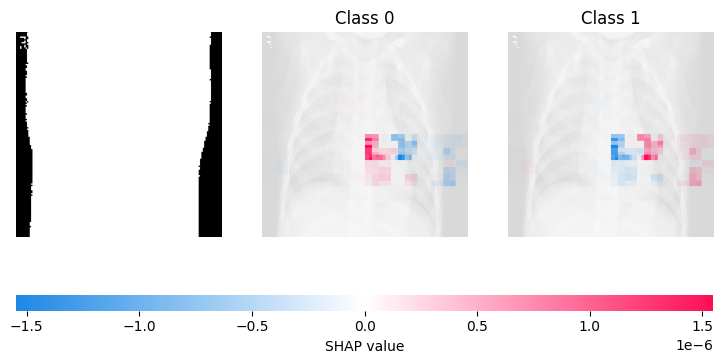

In [22]:
import shap

# Assuming X_train is your training data
# Get the shape of a single image in your dataset
single_image_shape = X_train[1].shape

# Initialize the Image masker
masker = shap.maskers.Image(mask_value=128, shape=single_image_shape)

# Assuming model is your trained CNN model
explainer = shap.Explainer(model, masker)

# Choose a specific sample from the test set for explanation
sample_idx = 0  # Change this to the index of the sample you want to explain

# Calculate SHAP values
shap_values = explainer(X_test[sample_idx:sample_idx + 1])

# Assuming shap_values is a single-sample array and has shape (1, height, width, channels)
shap_values_single_sample = shap_values[0]

# Assuming X_test[sample_idx] is your input image and has shape (height, width, channels)
input_image = X_test[sample_idx]

# Assuming your model predicts probabilities for two classes (binary classification)
class_names = ["Class 0", "Class 1"]

# Visualize the explanation
shap.image_plot(shap_values_single_sample, input_image, labels=[class_names], show=True)
